In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
%matplotlib inline




In [2]:
import numpy as np
import pandas as pd


In [3]:
import datetime as dt


In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [5]:
engine = create_engine('sqlite:///GWDC201805DATA3-Class-Repository-DATA/Homework/09-Adv-Data-Storage-Retrieval (Week 11)/Instructions/Resources/hawaii.sqlite')
      

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
results=session.query(Measurement.date,Measurement.prcp,Measurement.station).filter(Measurement.date.between('2016-08-23','2017-08-23'))


In [13]:
# Calculate the date 1 year ago from today, taking the day as 2017-08-17
engine.execute("SELECT prcp From measurement where date='2017-08-17'").fetchall()


[(0.0,), (0.05,), (0.01,), (0.13,)]

In [14]:
#  Load the query results into a Pandas DataFrame and set the index to the date column.
df=pd.read_sql(results.statement,results.session.bind)

df.head()


,date,prcp,station
0,2016-08-23,0.00,USC00519397
1,2016-08-24,0.08,USC00519397
2,2016-08-25,0.08,USC00519397
3,2016-08-26,0.00,USC00519397
4,2016-08-27,0.00,USC00519397


In [15]:
df.sort_values("date", inplace=True)


In [16]:
df_set=df.set_index('date')


In [17]:
df_group= df_set.groupby(['date'])['prcp'].sum()
df_group=pd.DataFrame(df_group)
df_group.head()    


,prcp
date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32


In [18]:
date=df_group.index.tolist()


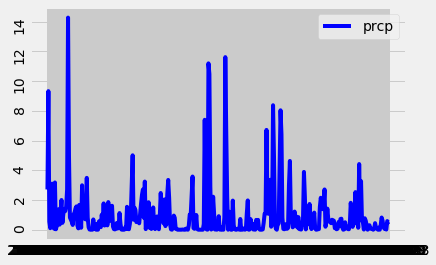

<module 'matplotlib.pyplot' from '/Users/antetsi/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [19]:
style.use('fivethirtyeight')

prcp_graph=plt.plot(date,df_group['prcp'],color="blue")
plt.legend(loc="best")
plt.yticks(rotation=90)
plt.show()
plt


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_group.describe()


,prcp
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


In [21]:
# How many stations are available in this dataset?
df_stcount= df.groupby(['station']).count()
len(df_stcount)


7

In [22]:
df_stcount


,date,prcp
station,,
USC00513117,343,343
USC00514830,305,265
USC00516128,349,328
USC00517948,183,60
USC00519281,352,352
USC00519397,361,359
USC00519523,337,314


In [23]:
# How many stations are available in this dataset?
querys=session.query(Measurement.station, func.sum(Measurement.prcp)).group_by(Measurement.station).all()
len(querys)

9

In [24]:
# What are the most active stations?
querys=session.query(Measurement.station, func.sum(Measurement.prcp)).group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
querys

[('USC00516128', 1068.0899999999956),
 ('USC00519281', 588.6399999999976),
 ('USC00513117', 382.61999999999847),
 ('USC00519523', 295.67999999999944),
 ('USC00514830', 234.49000000000026),
 ('USC00519397', 131.62000000000063),
 ('USC00511918', 92.68000000000006),
 ('USC00518838', 70.87000000000005),
 ('USC00517948', 43.44000000000002)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

result=session.query((func.min(Measurement.tobs)),(func.max(Measurement.tobs)),(func.avg(Measurement.tobs))).filter(Measurement.station=='USC00516128').all()
result

[(58.0, 84.0, 70.91500765696784)]

In [26]:
# Choose the station with the highest number of temperature observations.
result=session.query(func.max(Measurement.tobs),Measurement.station).all()
result

[(87.0, 'USC00519397')]

In [30]:
# use station id USC00519397 and find the temperature in that station for a year. The period of the year is taken from 2016-08-23 to 2017-08-23.
resulted=session.query((Measurement.tobs)).filter((Measurement.date.between('2016-08-23','2017-08-23')),(Measurement.station=='USC00519397')).all()

In [31]:
df = pd.DataFrame(resulted)

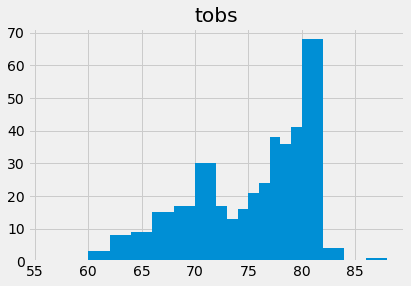

In [32]:
bins=[56,58,60,62,64,66,68,70,72,73,74,75,76,77,78,79,80,82,84,86,88]
df.hist(bins=bins,rwidth=1.0)
plt.show()

In [33]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
class Vacation():
    def __init__(self,start_date,end_date):
        self.start_date=start_date
        self.end_date=end_date
        
    def calc(self):
         return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= self.start_date).filter(Measurement.date <= self.end_date).all()

In [34]:
#taking instances for any vacation day
vacation1=Vacation('2012-02-28', '2012-03-05')
vacation2=Vacation('2011-02-28','2011-03-05')
vacation3=Vacation('2012-08-24','2012-08-28')

In [35]:
vacation1.calc()

[(62.0, 69.57142857142857, 74.0)]

In [36]:
# Use the same formula to see previous year's data for those same dates.
vacation2.calc()

[(61.0, 69.75510204081633, 75.0)]

In [37]:
# using the results from the previous query to draw a bar chart....
df=vacation2.calc()

In [39]:
df= pd.DataFrame(df,columns=['tmin','tavg','tmax'])
df['tavg']

0    69.755102
Name: tavg, dtype: float64

In [40]:
x=df['tmax']-df['tmin']

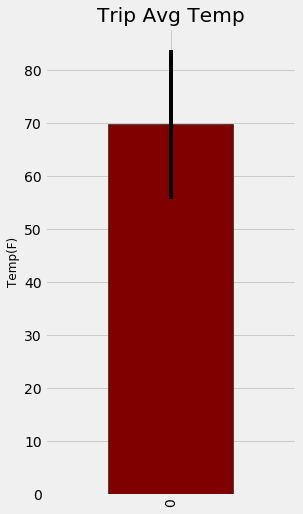

In [42]:
fig, ax = plt.subplots()
df['tavg'].plot.bar(yerr=x,colormap='seismic_r',edgecolor='black',figsize=(4,8),title ="Trip Avg Temp", ax=ax)
ax.set_ylabel("Temp(F)", fontsize=12)
plt.show()

In [43]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
engine.execute("select station.name,station.latitude, station.longitude, station.elevation\
               from station\
               inner join measurement on measurement.station=station.station\
               where (measurement.date BETWEEN '2011-02-28' and '2011-03-05')\
               group by station.station\
               order by measurement.prcp desc").fetchall()

[('UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 ('WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 ('KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]